In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
sns.set_context('notebook')

# Loading Data

In [607]:
data = pd.read_csv('\\Users\luisr\Desktop\Repository\IBM_courses\Course Work\Assignments\Final Capstone Project\\rio dataframes\\Final Data\\gym_neighborhood_data.csv')

# Feature Selection: Population

In [687]:
pop = data[['neighborhood', 'População', 'pop/Km2', 'target pop', 'target_pop/Km2', 'Km2']].set_index('neighborhood').copy()

# Feature Definition

#### Feature Set 1

In [676]:
x_df = pop[['target pop', 'pop/Km2']]

x = pop['target pop']
y = pop['pop/Km2']

z = pop[['target_pop/Km2']]

In [641]:
w = pop['População'].copy()

# Feature Definition: Outliers Removed

In [597]:
z = pop[['target_pop/Km2']]
z = z[z.iloc[:,0]<12]

x_df = pop[['target pop', 'pop/Km2']].loc[z.index]

x = pop['target pop'].loc[z.index]
y = pop['pop/Km2'].loc[z.index]

In [641]:
w = pop['População'].loc[z.index].copy()

# 2D Regression

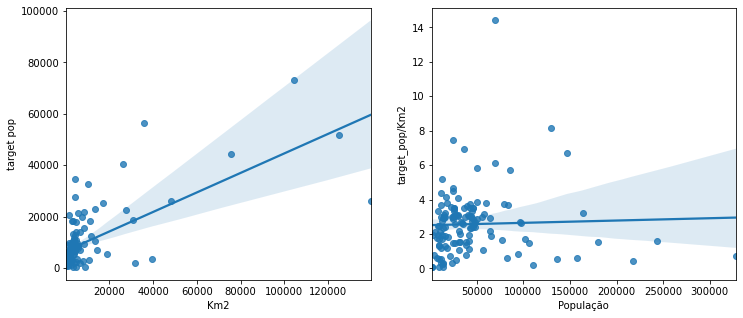

In [696]:
fig, axes = plt.subplots(1,2, figsize=(12,5))
sns.regplot(y,z, ax=axes[0])
sns.regplot(pop['População'], x, ax=axes[1])

# 3D Regression

In [691]:
from sklearn.linear_model import LinearRegression as lr
from sklearn.preprocessing import StandardScaler as ss, MinMaxScaler as mms
from sklearn.metrics import r2_score

In [692]:
lr_obj = lr().fit(x_df, z)

a1 = lr_obj.coef_[0][0]
a2 = lr_obj.coef_[0][1]
b = lr_obj.intercept_[0]

In [693]:
x1 = np.linspace(x.min(), x.max(), len(x))
y1 = np.linspace(y.min(), y.max(), len(y))

xs, ys = np.meshgrid(x1,y1)

zs = np.array([(a1*x_i + a2*y_i + b) for x_i, y_i in zip(xs, ys)])

z_pred = a1*x + a2*y + b

In [694]:
r2_score(z, z_pred)

0.5472977822567258

# 3D Visualization

In [681]:
colors = ['Red' if cond else 'blue' for cond in (z.iloc[:,0]>z_pred).values]

In [682]:
from IPython.display import clear_output
import time

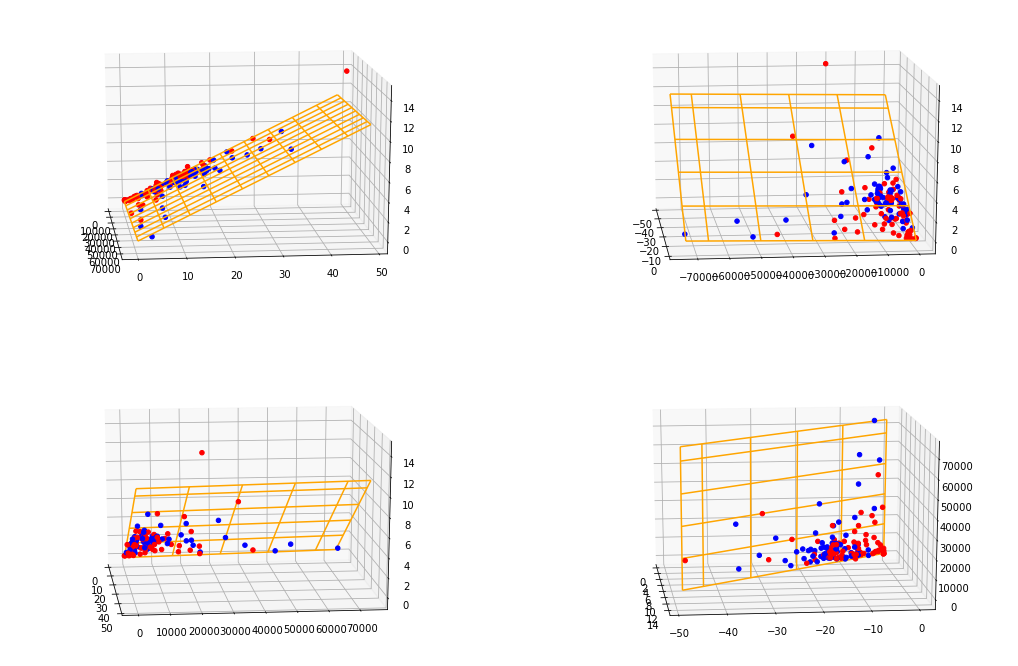

In [683]:
for angle in range(0, 360, 6):    
    
    fig = plt.figure(figsize=(18, 12))
    axes = [fig.add_subplot(2,2,i, projection='3d') for i in range(1,5)]

    axes[0].plot_wireframe(xs, ys, zs, rstride=15, cstride=15, color='orange')
    axes[0].scatter(x, y, z, c=colors, alpha=1)

    axes[1].plot_wireframe(-ys, -xs, zs, rstride=30, cstride=30, color='orange')
    axes[1].scatter(-y, -x, z, c=colors, alpha=1)

    axes[2].plot_wireframe(ys, xs, zs, rstride=30, cstride=30, color='orange')
    axes[2].scatter(y, x, z, c=colors, alpha=1)

    axes[3].plot_wireframe(zs, -ys, xs, rstride=30, cstride=30, color='orange')
    axes[3].scatter(z.values.ravel(), -y, x, c=colors, alpha=1)

    axes[0].view_init(15, angle)
    axes[1].view_init(15, angle)
    axes[2].view_init(15, angle)
    axes[3].view_init(15, angle)

    plt.show()  
    plt.pause(0.0001)
    
    clear_output(wait=True)

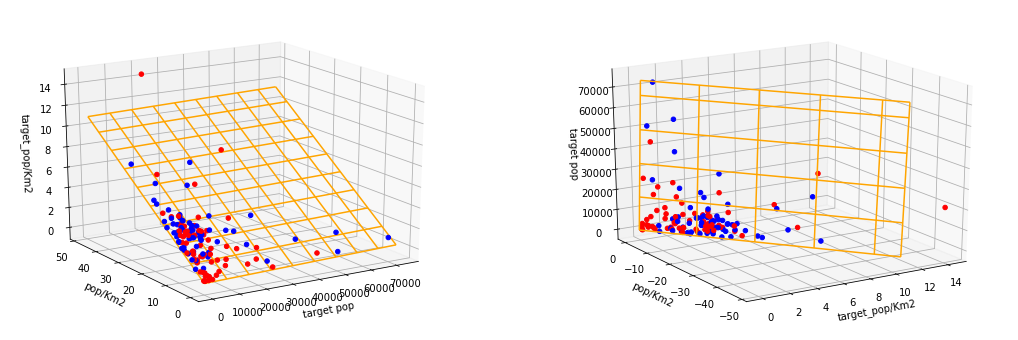

In [684]:
for angle in range(0, 240, 14):    
    
    fig = plt.figure(figsize=(18, 6))
    axes = [fig.add_subplot(1,2,i, projection='3d') for i in range(1,3)]

    axes[0].plot_wireframe(xs, ys, zs, rstride=15, cstride=15, color='orange')
    axes[0].scatter(x, y, z, c=colors, alpha=1)

    axes[1].plot_wireframe(zs, -ys, xs, rstride=30, cstride=30, color='orange')
    axes[1].scatter(z.values.ravel(), -y, x, c=colors, alpha=1)

    axes[0].view_init(20, angle)
    axes[1].view_init(20, angle)
    
    axes[0].set_xlabel(x.name)
    axes[0].set_ylabel(y.name)
    axes[0].set_zlabel(z.columns[0])

    axes[1].set_xlabel(z.columns[0])
    axes[1].set_ylabel(y.name)
    axes[1].set_zlabel(x.name)
    
    plt.show()  
    plt.pause(0.001)
    
    clear_output(wait=True)

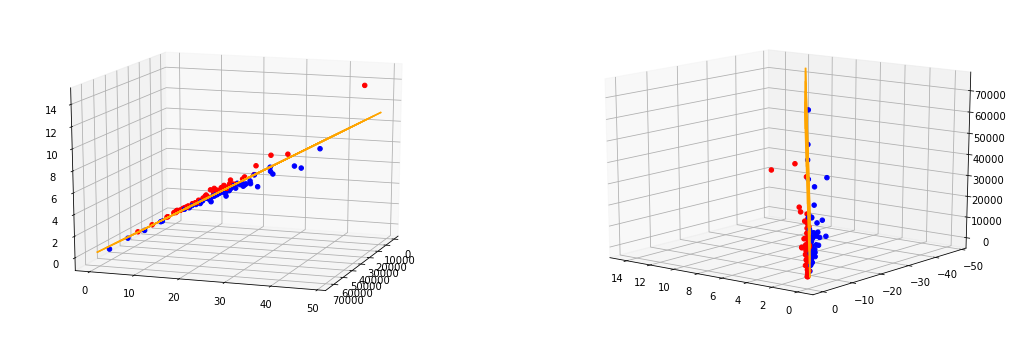

In [631]:
fig = plt.figure(figsize=(18, 6))
axes = [fig.add_subplot(1,2,i, projection='3d') for i in range(1,3)]

axes[0].plot_wireframe(xs, ys, zs, rstride=15, cstride=15, color='orange')
axes[0].scatter(x, y, z, c=colors, alpha=1)

axes[1].plot_wireframe(zs, -ys, xs, rstride=30, cstride=30, color='orange')
axes[1].scatter(z.values.ravel(), -y, x, c=colors, alpha=1)
i+=1
axes[0].view_init(15, 19)
axes[1].view_init(15, 128)

# 2D Scatter Plots

In [649]:
features = [x,y,z.iloc[:,0],w]

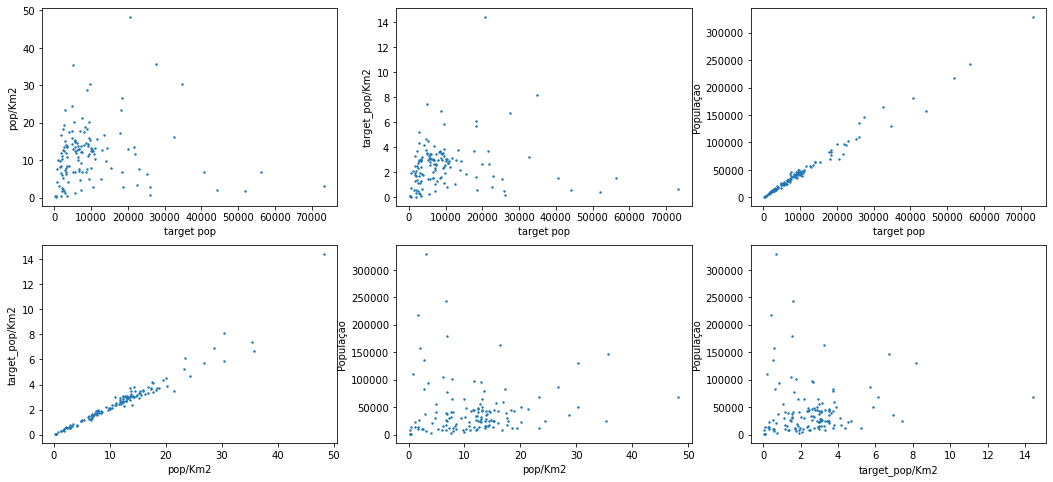

In [660]:
fig = plt.figure(figsize=(18,8))
axes = [fig.add_subplot(2,3,i) for i in range(1,7)]

cnt=0
for i in range(4):
    for j in range(4):
        
        if i<j:
            
            axes[cnt].scatter(features[i], features[j], s=2)
            
            axes[cnt].set_xlabel(features[i].name)
            axes[cnt].set_ylabel(features[j].name)
            cnt+=1

# Data Transformation

In [637]:
from sklearn.preprocessing import StandardScaler as ss, MinMaxScaler as mms

In [638]:
pop_log = pop.apply(np.log1p).copy()

In [639]:
pop_ss = ss().fit_transform(pop_log)
pop_mms = mms().fit_transform(pop_log)

---
# Density Based Scan Clustering

In [666]:
colors = ['orange', 'darkblue', 'yellow', 'darkred', 'darkgreen', 'purple', 'lightgreen', 'pink', 'black', 'lightblue']     # Colors to differentiate clusters

In [636]:
from sklearn.cluster import DBSCAN

In [664]:
dbs = DBSCAN()

dbs.fit(pop[['target_pop/Km2', 'pop/Km2']])

pop['cluster'] = dbs.labels_

In [668]:
pop['cluster'].unique()

array([-1,  0,  1,  2,  3], dtype=int64)

# Cluster Visualization

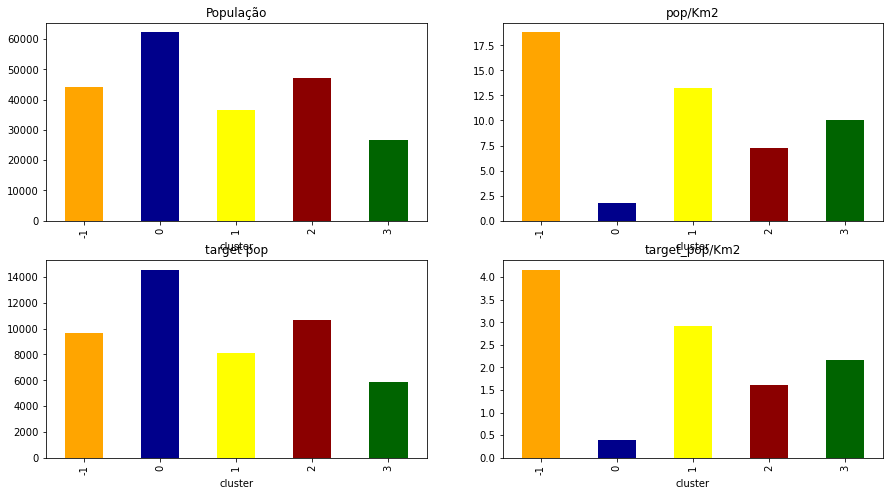

In [669]:
pop_mean = pop.groupby('cluster').mean()

fig = plt.figure(figsize=(15,8))
axes = [fig.add_subplot(2,2,i) for i in range(1, len(pop.columns))]

for i, col in enumerate(pop_mean):
    pop_mean[col].plot(kind='bar', ax=axes[i], title=pop.columns[i], color=[colors[j] for j in range(len(pop['cluster'].unique()))])

### Boxplot

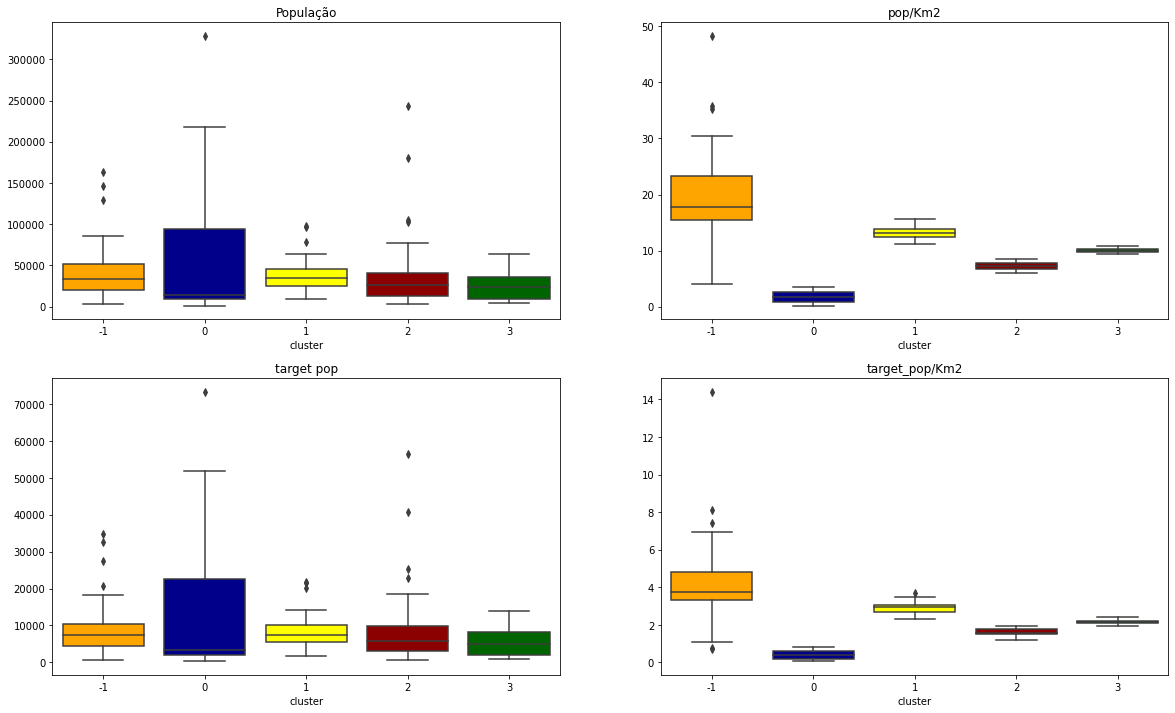

In [670]:
fig = plt.figure(figsize=(20,12))
axes=[fig.add_subplot(2,2,i+1) for i in range(len(pop.columns)-1)]

for i in range(len(pop.columns)-1):
    
    sns.boxplot(data=pop, x='cluster', y=pop.columns[i], ax=axes[i])
    axes[i].set_ylabel('')
    axes[i].set_title(pop.columns[i])
    
    #if i==len(income.columns)-3:
     #   axes[i].set_ylim(-10000000,1e9*0.2)
    
    for j in range(len(pop['cluster'].unique())):
        axes[i].artists[j].set_facecolor(colors[j])    # Setting colors to match clusters colors.

### 3D Scatter Plot

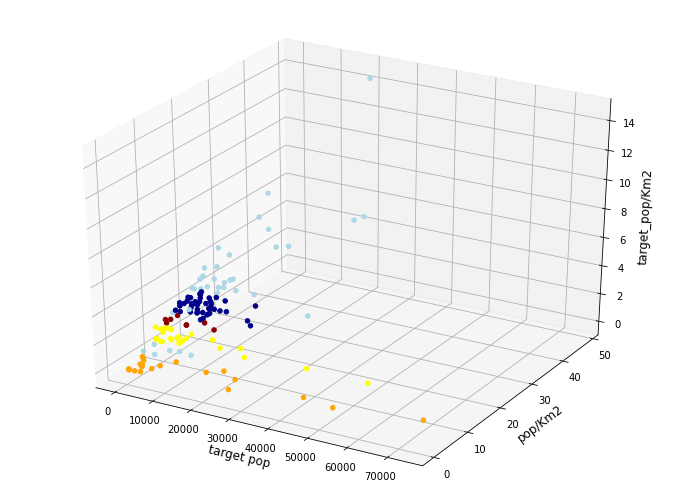

In [671]:
ys = pop.iloc[:, 1]
xs = pop.iloc[:, 2]
zs = pop.iloc[:, 3]
zss = pop.iloc[:, 0]

fig = plt.figure(figsize=(12,9))
ax0 = fig.add_subplot(111, projection='3d')

ax0.scatter(xs, ys, zs=zs, c=[colors[cluster] for cluster in pop['cluster']], alpha=1)

ax0.set_ylabel(pop.columns[1], fontsize=12)
ax0.set_xlabel(pop.columns[2], fontsize=12)
ax0.set_zlabel(pop.columns[3], fontsize=12)

#ax0.set_zlim(-1000, 30000)
#ax0.set_xlim(-100, 4000)
#ax0.set_zlim(-1000, 30000)

plt.show()

### 2D Scatter Plot

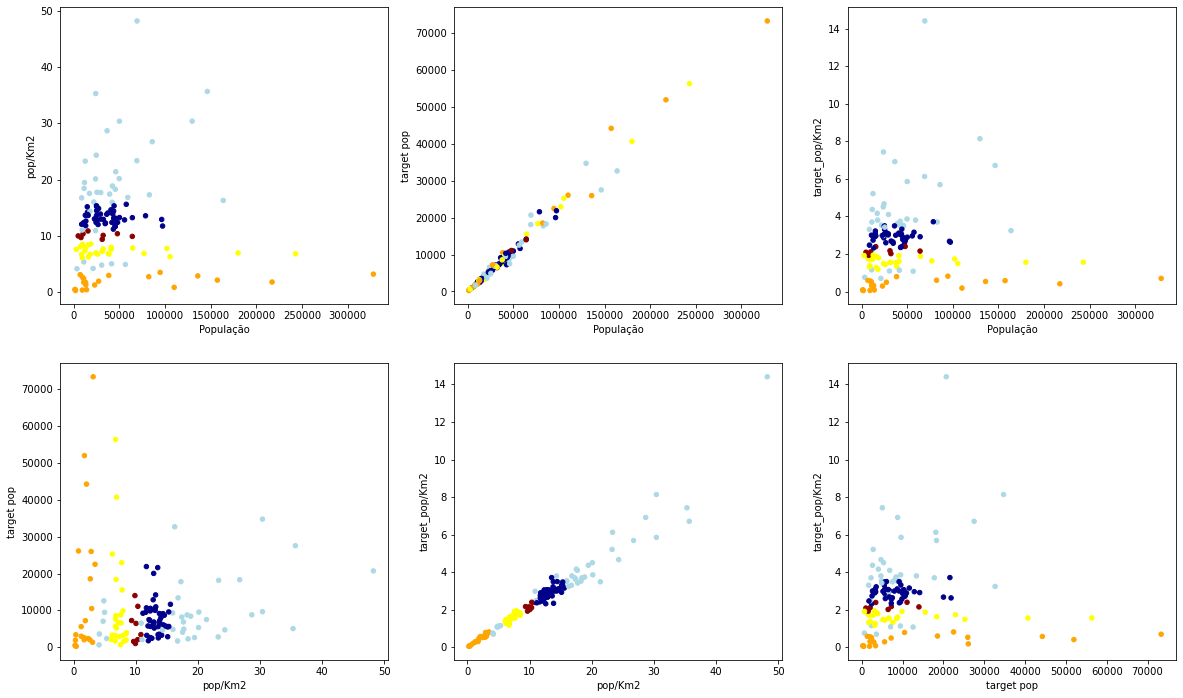

In [673]:
pop_cols = pop.columns[:-1]

fig = plt.figure(figsize=(20,12))
axes = [fig.add_subplot(2,3,i) for i in range(1,7)]

cnt = 0
for i in range(4):
    for j in range(4):
        
        if i<j:
            pop.plot.scatter(x=pop_cols[i], y=pop_cols[j], c=[colors[cluster] for cluster in pop['cluster']], alpha=1, ax=axes[cnt])
            cnt+=1


KeyError: 'cluster'

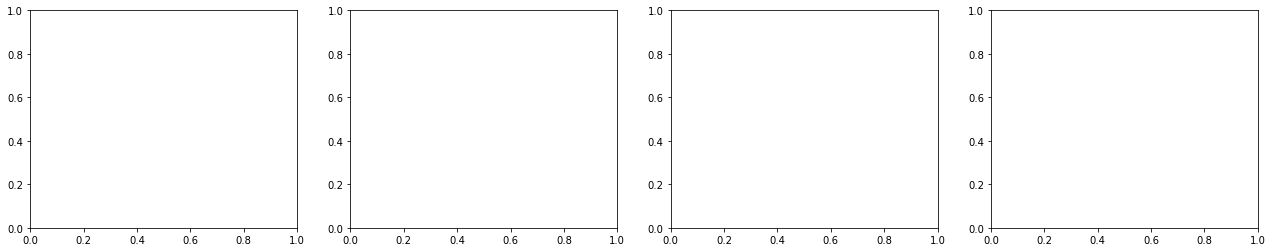

In [685]:
fig, axes = plt.subplots(1,4,figsize=(22,4))

for i, col in zip(range(4), pop.columns[:-1]):
    
    pop.sort_values(by=col)[col].plot.bar(color=[colors[cluster] for cluster in pop.sort_values(by=col)['cluster']], xticks=[], ax=axes[i], title=col, width=1)